In [1]:
!git clone https://github.com/sabiomito/uffgpu2019.git
%cd uffgpu2019
!git checkout master

%cd PROJETO
!mkdir animatedFolder

Cloning into 'uffgpu2019'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 488 (delta 0), reused 2 (delta 0), pack-reused 484
Receiving objects: 100% (488/488), 104.55 MiB | 29.12 MiB/s, done.
Resolving deltas: 100% (250/250), done.
/content/uffgpu2019
Already on 'master'
Your branch is up to date with 'origin/master'.
/content/uffgpu2019/PROJETO


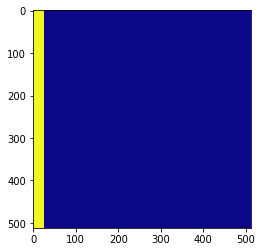

In [46]:
def fazEntrada(tam,show):
  from random import randint
  from random import seed
  arquivo = open('entrada.txt', 'w')
  data = []
  for i in range(tam):
    dt = []
    for j in range(tam):
      if(j<tam/20):#(j>tam/2-5 and j<tam/2+4):# and i>128 and i<1024-128):# or (j>120 and j<130 and i >120 and i<130)):
        dt.append(3)
      else:
        dt.append(0)
      
    data.append(dt)


  #seed(30)
  #for i in range(tam):
  #  data[randint(0,tam-1)][randint(0,tam-1)] = 3


  for i in range(tam):
    txt = ""
    for j in range(tam):
      txt+=" "+str(data[i][j])
    arquivo.write(txt+"\n")
  arquivo.close()


  from matplotlib import pyplot as plt
  arquivo = open('entrada.txt', 'r')
  img = []
  for linha in arquivo:
      img.append(list(map(int,linha.split())))
  #print(img)
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  if(show):
    plt.show()
fazEntrada(512,True)

In [0]:
import os
def compile(steps):
  !nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH=1024
  string = "./go "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile0(size,steps,blockX,blockY):
  string = "nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH="+str(size)+" BLOCKDIM_Y="+str(blockY)+" BLOCKDIM_X="+str(blockX)
  print(string)
  os.system(string)
  string = "./go "+str(steps)
  print(string)
  os.system(string)
  #!./go steps


def compile2(size,order,steps):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlocking.cu  -o go
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile3(size,order,steps):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=1024
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile4(size,order,steps):
  string = "nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH="+str(size)
  print(string)
  os.system(string)
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)
  print(string)
  os.system(string)
  #!./go steps

def compile_TimeTest_blocksDim(size,order,steps,BX,BY):
  string = "nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH="+str(size)
  print(string)
  os.system(string)
  string = "./go "+str(size)+" "+str(order)+" "+str(steps)+" "+str(BX)+" "+str(BY)
  print(string)
  os.system(string)
  #!./go steps

def show():
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  plt.show()
  return img

def show2(tam):
  arquivo = open('resultado.txt', 'r')
  img = []
  lin = []
  cont = 0
  for linha in arquivo:
    lin.append(list(map(float,linha.split()))[0])
    cont+=1
    #print("len"+str(len(lin)))
    if(cont==tam):
      img.append(lin)
      lin = []
      cont=0
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  plt.show()
  return img
  #for i in img:
  #  print(i)

from matplotlib import pyplot as plt
def saveToGif(t):
  arquivo = open('resultado.txt', 'r')
  img = []
  for linha in arquivo:
    img.append(list(map(float,linha.split())))
  arquivo.close()
  plt.imshow(img,cmap='plasma')
  name = "animatedFolder/animated"+str(t)
  plt.savefig(name)
  return(name+".png")
  #plt.show()

In [0]:
!nvcc 3DstencilCPU.cpp  -o go
!./go

In [0]:
!nvcc 3DstencilGPUGlobalMemory.cu  -o go
!./go 512 512 160 2

^C


In [0]:
#0.59546
!nvcc 3DstencilGPUSharedMemory.cu -o go
!./go 32 32 4

X 32 || Y 32 
BX 32 || BY 32
GX 1 || GY 1
Z 4 
[4096,0.63600,-94503384.15656],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCpuBorder.cu  -o go
!./go 4 4 2 4

In [0]:
!nvcc 3DstencilGPUMiciquevicious.cu  -o go
!./go 16 16 80 4

3DstencilGPUMiciquevicious.cu(93): warning: variable "times" was set but never used

3DstencilGPUMiciquevicious.cu(106): warning: variable "k" was set but never used

X 16 || Y 16 
BX 16 || BY 16
GX 1 || GY 1
Z 80 
[20480,0.11018,-94788047.29772],


In [0]:
!nvcc 3DstencilGPUGlobalMemoryCube.cu  -o go
!./go 16 16 16 4

In [0]:
!gcc 2DstencilCPU.cpp -o go
!./go 64 2 8



 coefs 
 1.000000 0.500000
 coefs 


In [0]:
!nvcc 2DstencilGPUGlobalMemory.cu  -o go
!./go 64 8 1


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.03622],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryCPUBorder.cu  -o go
!./go 4096 8 4


 coefs 
 1.000000 0.800000 0.600000 0.400000 0.200000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.21747],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu  -o go
!./go 64 2 30


 coefs 
 1.000000 0.500000
 coefs 
X 64 || Y 64 
BX 32 || BY 32 
[4096,0.29696],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorder.cu  -o go
!./go 4096 16 32


 coefs 
 1.000000 0.888889 0.777778 0.666667 0.555556 0.444444 0.333333 0.222222 0.111111
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,208.23654],


In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu  -o go
!./go 4096 2 3 32 32

2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu(97): warning: variable "sharedTam" was declared but never referenced


 coefs 
 1.000000 0.500000
 coefs 
X 4096 || Y 4096 
BX 32 || BY 32 
[16777216,6.02253],


In [0]:
!nvcc 2DstencilGPUGlobalMemoryBlankBorder.cu -o runGlobal && nvcc 2DstencilGPUSharedMemoryBlankBorder.cu -o runShared && nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharing.cu -o runTime && ./runGlobal 4096 4 1 > Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 2 >> Global_4096_4.txt && echo 4096 4 2 && ./runGlobal 4096 4 3 >> Global_4096_4.txt && echo 4096 4 3 && ./runGlobal 4096 4 4 >> Global_4096_4.txt && echo 4096 4 4 && ./runGlobal 4096 4 5 >> Global_4096_4.txt && echo 4096 4 5 && ./runGlobal 4096 4 6 >> Global_4096_4.txt && echo 4096 4 6 && ./runGlobal 4096 4 7 >> Global_4096_4.txt && echo 4096 4 7 && ./runGlobal 4096 4 8 >> Global_4096_4.txt && echo 4096 4 8 && ./runGlobal 4096 4 9 >> Global_4096_4.txt && echo 4096 4 9 && ./runGlobal 4096 4 10 >> Global_4096_4.txt && echo 4096 4 1 && ./runGlobal 4096 4 11 >> Global_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 1 > Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 2 >> Shared_4096_4.txt && echo 4096 4 2 && ./runShared 4096 4 3 >> Shared_4096_4.txt && echo 4096 4 3 && ./runShared 4096 4 4 >> Shared_4096_4.txt && echo 4096 4 4 && ./runShared 4096 4 5 >> Shared_4096_4.txt && echo 4096 4 5 && ./runShared 4096 4 6 >> Shared_4096_4.txt && echo 4096 4 6 && ./runShared 4096 4 7 >> Shared_4096_4.txt && echo 4096 4 7 && ./runShared 4096 4 8 >> Shared_4096_4.txt && echo 4096 4 8 && ./runShared 4096 4 9 >> Shared_4096_4.txt && echo 4096 4 9 && ./runShared 4096 4 10 >> Shared_4096_4.txt && echo 4096 4 1 && ./runShared 4096 4 11 >> Shared_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 1 > Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 2 >> Time_4096_4.txt && echo 4096 4 2 && ./runTime 4096 4 3 >> Time_4096_4.txt && echo 4096 4 3 && ./runTime 4096 4 4 >> Time_4096_4.txt && echo 4096 4 4 && ./runTime 4096 4 5 >> Time_4096_4.txt && echo 4096 4 5 && ./runTime 4096 4 6 >> Time_4096_4.txt && echo 4096 4 6 && ./runTime 4096 4 7 >> Time_4096_4.txt && echo 4096 4 7 && ./runTime 4096 4 8 >> Time_4096_4.txt && echo 4096 4 8 && ./runTime 4096 4 9 >> Time_4096_4.txt && echo 4096 4 9 && ./runTime 4096 4 10 >> Time_4096_4.txt && echo 4096 4 1 && ./runTime 4096 4 11 >> Time_4096_4.txt && echo 4096 4 1  

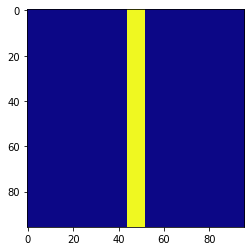

In [0]:
from matplotlib import pyplot as plt
arquivo = open('resultado.txt', 'r')
img = []
for linha in arquivo:
  img.append(list(map(float,linha.split())))
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

In [0]:

import imageio
'''
filenames = []
for i in range(1,12000,200):
  compile(i)
  filenames.append(saveToGif(i))
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('animatedFolder/animated0.gif', images)
max 21 times
'''

for times in range(1,21,1):
  filenames = []
  for i in range(1,19000,200):
    compile2(96,times,i)
    filenames.append(saveToGif(i))
  images = []
  for filename in filenames:      
      images.append(imageio.imread(filename))
  imageio.mimsave('animatedFolder/animated0'+str(times)+'.gif', images)

./go 256 9 1


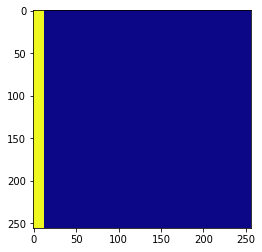

./go 256 9 1051


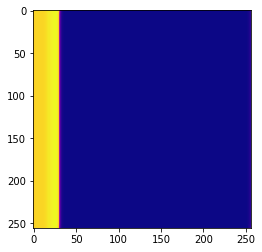

./go 256 9 2101


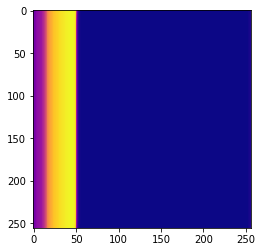

./go 256 9 3151


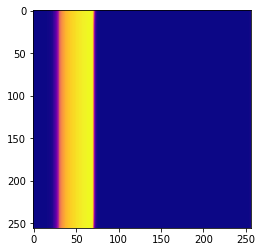

./go 256 9 4201


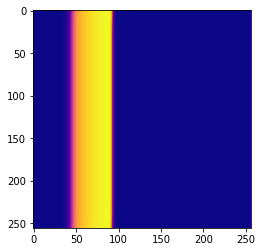

./go 256 9 5251


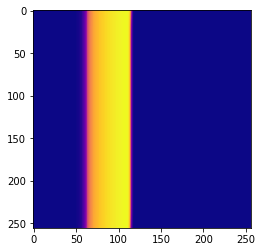

./go 256 9 6301


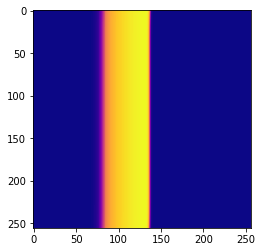

./go 256 9 7351


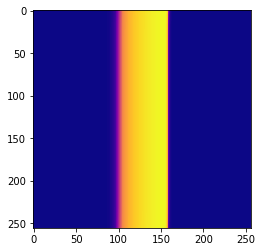

./go 256 9 8401


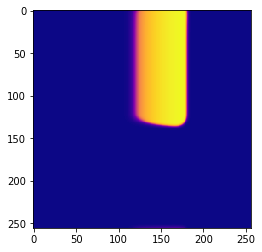

./go 256 9 9451


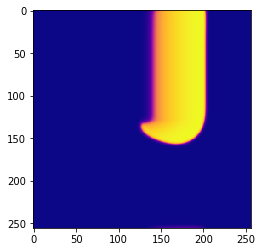

./go 256 9 10501


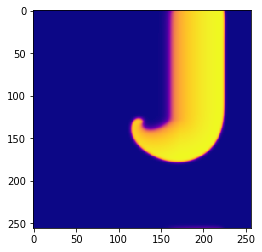

./go 256 9 11551


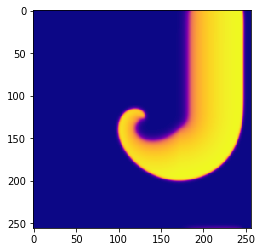

./go 256 9 12601


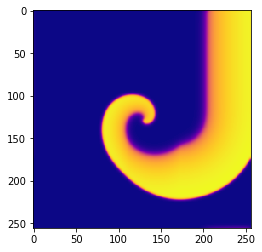

./go 256 9 13651


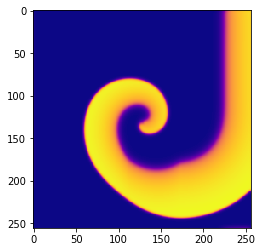

./go 256 9 14701


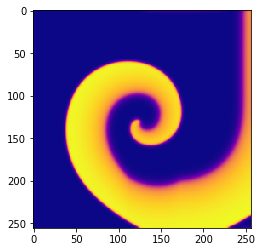

./go 256 9 15751


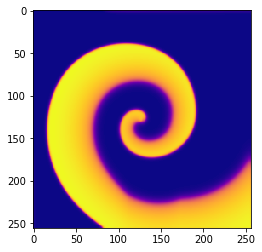

./go 256 9 16801


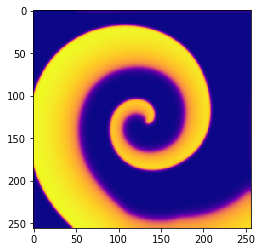

./go 256 9 17851


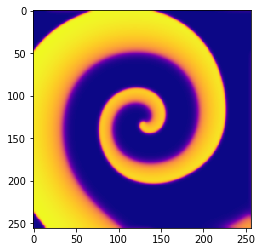

./go 256 9 18901


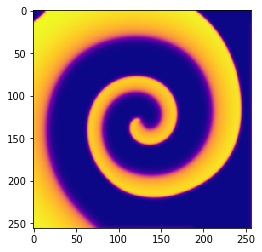

./go 256 9 19951


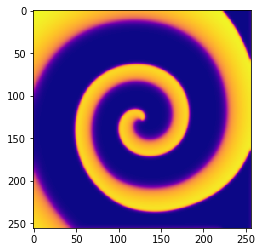

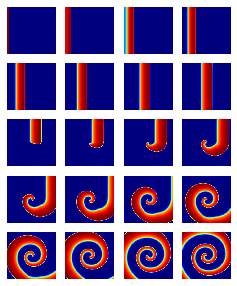

'\naxarr[0,0].imshow(image_datas[0])\naxarr[0,1].imshow(image_datas[1])\naxarr[1,0].imshow(image_datas[2])\naxarr[1,1].imshow(image_datas[3])\n'

In [0]:
import imageio
'''
filenames = []
for i in range(1,50000,500):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingSpiralSimulation.cu  -o go -D MODEL_WIDTH=256
  string = "./go 256 1 "+str(i)
  print(string)
  os.system(string)
  img = show()
  filenames.append(saveToGif(i))
images = []
for filename in filenames:      
    images.append(imageio.imread(filename))
imageio.mimsave('animatedFolder/animatedSpiral.gif', images)
'''
'''
import imageio
for size in range(64,800,32):
  fazEntrada(size,False)
  filenames = []
  for i in range(1,19000,400):
    compile4(size,15,i)
    filenames.append(saveToGif(i))
  images = []
  for filename in filenames:      
      images.append(imageio.imread(filename))
  imageio.mimsave('animatedFolder/animated0'+str(size)+'.gif', images)
'''
'''
for i in range(32,800,32):
  print("Entrada ")
  fazEntrada(i,False)
  compile4(i,15,6000)
'''
'''
for i in range(15):
  !nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingSpiralSimulation.cu  -o go -D MODEL_WIDTH=256
  string = "./go 256 "+str(i)+" 12000"
  print(string)
  os.system(string)
  img = show()
'''

'''
fazEntrada(256,False)
!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingSpiralSimulation.cu  -o go -D MODEL_WIDTH=256
!./go 256 9 21000
img = show()
'''

X,Y = 4,5
!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingSpiralSimulation.cu  -o go -D MODEL_WIDTH=256
fazEntrada(256,False)
images = []
qt = 21000/(Y*X)
for i in range(1,21001,int(qt)):
  string = "./go 256 9 "+str(i)
  print(string)
  os.system(string)
  images.append(show())


f, axarr = plt.subplots(Y,X,figsize=(X,Y))
for x in range(X):
  for y in range(Y):
    axarr[y,x].imshow(images[x+X*y])
    axarr[y,x].axis('off')
    axarr[y,x].axis('image')
    axarr[y,x].axis("tight")
    #axarr[y,x].set_cmap('seismic')


plt.set_cmap('jet')

#.add_axes(ax)
plt.savefig("test.png", dpi=1200)
plt.show()


'''
axarr[0,0].imshow(image_datas[0])
axarr[0,1].imshow(image_datas[1])
axarr[1,0].imshow(image_datas[2])
axarr[1,1].imshow(image_datas[3])
'''


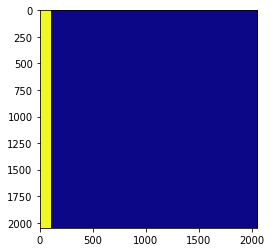

2DstencilGPUSharedMemoryKarma.cu(151): warning: variable "start" was set but never used

2DstencilGPUSharedMemoryKarma.cu(151): warning: variable "end" was declared but never referenced

[0,11475.34668][1,14572.33984][2,10952.16016][3,10534.46875]

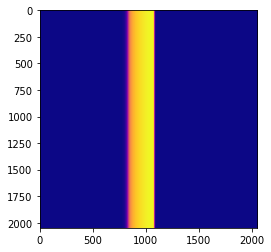

              total        used        free      shared  buff/cache   available
Mem:          13022        5269        4215           0        3537       11474
Swap:             0           0           0


In [51]:
fazEntrada(2048,True)
#!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingSpiralSimulation.cu  -o go -D MODEL_WIDTH=256
#! ./go 256 15 50000
#compile_TimeTest_blocksDim(256,15,8000,64,16)
#compile0(256,8000,32,32)


!nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH=2048 -D BLOCKDIM_Y=32 -D BLOCKDIM_X=32
!./go 20000
#img = show()


#sharedSize = 2 => 15552
!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlocking.cu  -o go -D MODEL_WIDTH=2048
!./go 2048 1 20000 32 32
!./go 2048 2 20000 32 32
!./go 2048 3 20000 32 32

img = show()
'''
!./go 768 2 8000 32 32
!./go 768 3 8000 32 32
!./go 768 4 8000 32 32
!./go 768 5 8000 32 32
!./go 768 6 8000 32 32
!./go 768 7 8000 32 32
!./go 768 8 8000 32 32
!./go 768 9 8000 32 32
!./go 768 10 8000 32 32
!./go 768 11 8000 32 32
!./go 768 12 8000 32 32
!./go 768 13 8000 32 32
!./go 768 14 8000 32 32
!./go 768 15 8000 32 32
!./go 768 16 8000 32 32
'''
!free -m


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


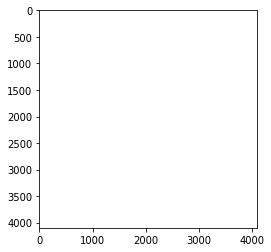

In [0]:
img = show()

In [0]:
import imageio
for filename in filenames:      
    images.append(imageio.imread(filename))
imageio.mimsave('animatedFolder/animatedSpiral.gif', images)

nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 1 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 2 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 3 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 4 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 5 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 6 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 7 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 8 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=768
./go 768 9 19000
nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlo

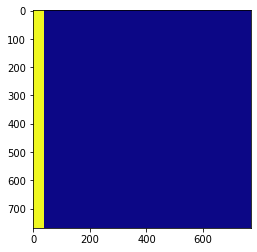

In [0]:
#!nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlockingTimeTest.cu  -o go -D MODEL_WIDTH=256
#! ./go 256 15 4000
#img = show()
import imageio

for size in range(768,800,32):
  for times in range(1,17,1):
    fazEntrada(size,False)
    #compile0(size,19000)
    compile4(size,times,19000)


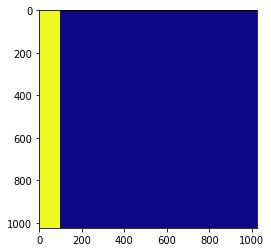

./go 12000


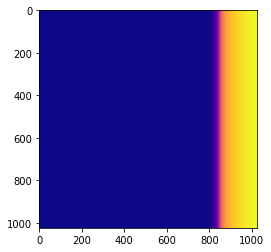

./go 1024 1 12000


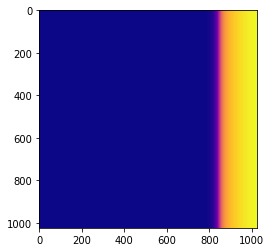

./go 1024 2 12000


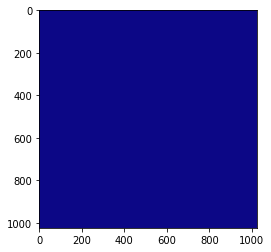

./go 1024 3 12000


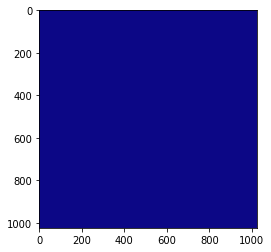

./go 1024 4 12000


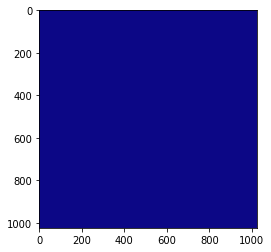

./go 1024 5 12000


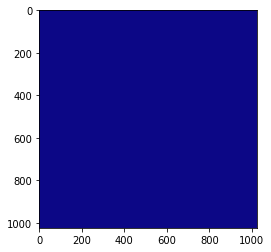

./go 1024 6 12000


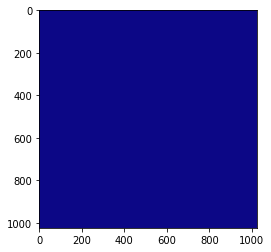

KeyboardInterrupt: ignored

In [0]:
from matplotlib import pyplot as plt
arquivo = open('entrada.txt', 'r')
img = []
for linha in arquivo:
    img.append(list(map(int,linha.split())))
#print(img)
arquivo.close()
plt.imshow(img,cmap='plasma')
plt.show()

#for i in range(1,30,1):
compile(12000)
img = show()
for i in range(1,21,1):
  compile3(1024,i,12000)
  img = show()

In [0]:
!git checkout -- .

In [0]:
for i in img:
  print(i)

[35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0, 35.0, 69.0, 103.0, 137.0, 171.0, 205.0, 239.0, 273.0, 307.0, 341.0, 375.0, 409.0, 443.0, 477.0, 511.0, 545.0, 579.0, 613.0, 647.0, 681.0, 715.0, 749.0, 783.0, 817.0, 851.0, 885.0, 919.0, 953.0, 987.0, 1021.0, 1055.0, 1089.0]
[36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 512.0, 546.0, 580.0, 614.0, 648.0, 682.0, 716.0, 750.0, 784.0, 818.0, 852.0, 886.0, 920.0, 954.0, 988.0, 1022.0, 1056.0, 1090.0, 36.0, 70.0, 104.0, 138.0, 172.0, 206.0, 240.0, 274.0, 308.0, 342.0, 376.0, 410.0, 444.0, 478.0, 51

In [0]:
!rm -R uffgpu2019/

In [0]:
!nvidia-smi

Fri Mar 13 00:55:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!nvcc 2DstencilGPUSharedMemoryBlankBorderTimeSpaceSharingOpencvKarma.cu -o go `pkg-config --cflags --libs opencv` -w
!./go 32 2 1


 coefs 
 1.000000 0.500000
 coefs 
Unable to init server: Could not connect: Connection refused

(orig:348): Gtk-WARNING **: 00:36:16.384: cannot open display: 


In [0]:
combinations = []
combinations.append((2,1))
for X in range(1,1024):
  for Y in range(1,1024):
    if((X*Y)%32==0 and ((X*Y)==1024 or(X*Y)==512 or (X*Y)==128 or (X*Y)==64) and X%4==0 and Y%4==0 and not((Y,X) in combinations)):
      combinations.append((X,Y))
      print(X,Y)


for comb in combinations:
  print("\n\\addplot[\ncolor=red,\nmark=triangle,\n]\ncoordinates {")
  for times in range(1,30):
    print("(",times,",",(((comb[0] + (2 * times)) * (comb[1] + (2 * times))) * 4 * 3),")");
  print("};")


print("\legend{",end="")
for comb in combinations:
  print(comb[0],"X",comb[1],",",end="");
print("};")

4 16
4 32
4 128
4 256
8 8
8 16
8 64
8 128
16 32
16 64
32 32

\addplot[
color=red,
mark=triangle,
]
coordinates {
( 1 , 144 )
( 2 , 360 )
( 3 , 672 )
( 4 , 1080 )
( 5 , 1584 )
( 6 , 2184 )
( 7 , 2880 )
( 8 , 3672 )
( 9 , 4560 )
( 10 , 5544 )
( 11 , 6624 )
( 12 , 7800 )
( 13 , 9072 )
( 14 , 10440 )
( 15 , 11904 )
( 16 , 13464 )
( 17 , 15120 )
( 18 , 16872 )
( 19 , 18720 )
( 20 , 20664 )
( 21 , 22704 )
( 22 , 24840 )
( 23 , 27072 )
( 24 , 29400 )
( 25 , 31824 )
( 26 , 34344 )
( 27 , 36960 )
( 28 , 39672 )
( 29 , 42480 )
};

\addplot[
color=red,
mark=triangle,
]
coordinates {
( 1 , 1296 )
( 2 , 1920 )
( 3 , 2640 )
( 4 , 3456 )
( 5 , 4368 )
( 6 , 5376 )
( 7 , 6480 )
( 8 , 7680 )
( 9 , 8976 )
( 10 , 10368 )
( 11 , 11856 )
( 12 , 13440 )
( 13 , 15120 )
( 14 , 16896 )
( 15 , 18768 )
( 16 , 20736 )
( 17 , 22800 )
( 18 , 24960 )
( 19 , 27216 )
( 20 , 29568 )
( 21 , 32016 )
( 22 , 34560 )
( 23 , 37200 )
( 24 , 39936 )
( 25 , 42768 )
( 26 , 45696 )
( 27 , 48720 )
( 28 , 51840 )
( 29 , 55056 )
};



In [0]:
blockSizes = []
blockSizes.append((4 , 4))
blockSizes.append((4, 8))
blockSizes.append((4, 16))
blockSizes.append((4, 32))
blockSizes.append((4, 128))
blockSizes.append((4, 256))
blockSizes.append((8, 8))
blockSizes.append((8, 16))
blockSizes.append((8, 64))
blockSizes.append((8, 128))
blockSizes.append((8, 256))
blockSizes.append((16, 32))
blockSizes.append((16, 64))
blockSizes.append((32, 32))
print(blockSizes)

timeSteps = list(range(1,15))
print(timeSteps)

dominios = []
dominios.append((256,256))
dominios.append((512,512))
dominios.append((1024,1024))
dominios.append((2048,2048))
dominios.append((4096,4096))
dominios.append((8192,8192))

print(dominios)

arquivo = open('graficosParaPlotar.txt', 'wt')
arquivo.write("\n-----------\n")
arquivo.write("\n-----------\n")
arquivo.write("\n blockSizes\n"+str(blockSizes)+"\n")
arquivo.write("\n timeSteps\n"+str(timeSteps)+"\n")
arquivo.write("\n dominios\n"+str(dominios)+"\n")

print(dominios[0][0])

import subprocess


for domain in dominios:
  arquivo.write("\n\n\n DOMINIO "+str(domain[0])+"x"+str(domain[0])+"\n\n")
  print("\n\n\n DOMINIO "+str(domain[0])+"x"+str(domain[0])+"\n\n")
  fazEntrada(domain[0],False)

  for blockSize in blockSizes:
    comado = "nvcc 2DstencilGPUSharedMemoryKarma.cu  -o go -D MODEL_WIDTH=+"+str(domain[0])+" -D BLOCKDIM_Y=+"+str(blockSize[0])+" -D BLOCKDIM_X="+str(blockSize[1])
    os.system(comado)
    x = subprocess.check_output(["./go", "8000"])
    arquivo.write(str(blockSize)+str(x).split("'")[1]+"\n")
    print(str(blockSize)+str(x).split("'")[1]+"\n")

  for blockSize in blockSizes:
    arquivo.write("----------\n\n"+str(blockSize)+"\n\n")
    print("----------\n\n"+str(blockSize)+"\n\n")
    for times in timeSteps:
      comado = "nvcc 2DstencilGPUSharedMemoryKarmaSpaceTimeBlocking.cu  -o go -D MODEL_WIDTH=+"+str(domain[0])
      os.system(comado)
      x = subprocess.check_output(["./go", str(domain[0]),str(times),str(8000),str(blockSize[0]),str(blockSize[1])])
      arquivo.write(str(x).split("'")[1]+"\n")
      print(str(x).split("'")[1]+"\n")

x = subprocess.check_output(["nvidia-smi"])
arquivo.write(str(x))
arquivo.close()


[(4, 4), (4, 8), (4, 16), (4, 32), (4, 128), (4, 256), (8, 8), (8, 16), (8, 64), (8, 128), (8, 256), (16, 32), (16, 64), (32, 32)]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[(256, 256), (512, 512), (1024, 1024), (2048, 2048), (4096, 4096), (8192, 8192)]
256



 DOMINIO 256x256


(4, 4)[0,207.53401]

(4, 8)[0,110.99571]

(4, 16)[0,72.26355]

(4, 32)[0,68.61945]

(4, 128)[0,69.54147]

(4, 256)[0,76.03146]

(8, 8)[0,87.28749]

(8, 16)[0,69.61008]

(8, 64)[0,70.13581]

(8, 128)[0,77.62499]

(8, 256)[0,319.67389]

(16, 32)[0,72.81882]

(16, 64)[0,77.65430]

(32, 32)[0,81.74474]

----------

(4, 4)


[1,224.01187]

[2,255.06236]

[3,313.46545]

[4,396.02991]

[5,489.91443]

